In [97]:
%load_ext autoreload
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
%autoreload

from CERNATAX.cernatax.cernatax import CERNATAX

cernatax = CERNATAX()
cernatax.summarize_ref_db()

A total of 7820904 miRNA-mRNA interaction and 176510 miRNA-lncRNA interaction
miRNA-mRNA                 7820904
miRNA-lncRNA                176510
miRNA-mRNA;miRNA-lncRNA      10915
Name: type, dtype: int64


In [99]:
cernatax.ref_db.database.value_counts()

miRWalk                                                                 6494557
RNAInter                                                                 425707
miRDB_6.0                                                                297889
RNAInter;miRTarBase_9.0                                                  252458
NPInter_4.0                                                              109142
                                                                         ...   
miRDB_6.0;RNAInter;ENCORI                                                     2
miRDB_6.0;ENCORI                                                              2
RNAInter;miRWalk;ENCORI                                                       2
miRDB_6.0;NPInter_4.0;miRTarBase_9.0                                          1
TargetSCAN_8.0;NPInter_4.0;miRTarBase_9.0;RNAInter;miRDB_6.0;miRWalk          1
Name: database, Length: 69, dtype: int64

In [100]:
cernatax.ref_db[cernatax.ref_db.type == 'miRNA-mRNA;miRNA-lncRNA'].to_csv('ceRNA_db_mix.csv')

In [101]:
%autoreload
ref_db = cernatax.ref_db

len(ref_db.miRNA.unique())

print(len(ref_db.ceRNA.unique()))
print(len(ref_db[ref_db.type == 'miRNA-mRNA'].ceRNA.unique()))

print(len(ref_db[ref_db.type == 'miRNA-lncRNA'].ceRNA.unique()))

30177
21354
12849


In [113]:
%autoreload
deg_strict_df = pd.read_csv('scz_deg_gene_strict.csv', index_col=0)
deg_loose_df = pd.read_csv('scz_deg_mRNA_loose.csv', index_col=0)

ceRNA_df, axis_df = cernatax.find_ceRNA_axis_by_DEG(deg_strict_df)

ceRNA_df.to_csv('SCZ_ceRNA_network.csv')
axis_df.to_csv('SCZ_ceRNA_axis.csv')

loose_axis_df = cernatax.expand_ceRNA_axis_by_loose_DEG(deg_strict_df, deg_loose_df)
loose_axis_df.to_csv('SCZ_ceRNA_loose_axis.csv')
loose_axis_df

,miRNA,ceRNA,species,database,type,miRNA_log2FC,ceRNA_log2FC,inference
1775644,hsa-miR-3064-5p,ARHGAP8,Homo sapiens,miRWalk,miRNA-mRNA,-2.123515,5.218091,loose
2651500,hsa-miR-3690,ARHGAP8,Homo sapiens,miRWalk,miRNA-mRNA,2.132123,5.218091,loose
4490251,hsa-miR-485-5p,ARHGAP8,Homo sapiens,miRWalk,miRNA-mRNA,-3.818348,5.218091,loose
1775806,hsa-miR-3064-5p,BCL2A1,Homo sapiens,miRWalk,miRNA-mRNA,-2.123515,1.586707,loose
1775833,hsa-miR-3064-5p,BIRC5,Homo sapiens,miRWalk,miRNA-mRNA,-2.123515,1.762193,loose
...,...,...,...,...,...,...,...,...
4493678,hsa-miR-485-5p,PFDN4,Homo sapiens,miRWalk,miRNA-mRNA,-3.818348,2.222695,loose
4493984,hsa-miR-485-5p,PRRT2,Homo sapiens,RNAInter,miRNA-mRNA,-3.818348,-1.558193,loose
4494347,hsa-miR-485-5p,RPL9,Homo sapiens,miRWalk,miRNA-mRNA,-3.818348,2.342160,loose
4494366,hsa-miR-485-5p,RPS7,Homo sapiens,miRWalk,miRNA-mRNA,-3.818348,1.601449,loose


/var/folders/0x/6vsm66sd6g3_gc636v4617km0000gn/T/ipykernel_9962/411532638.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(df.T)
/Users/chenlingxi/miniconda3/envs/stime/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


         names    scores  logfoldchanges     pvals  pvals_adj
1227  PPARGC1A  2.616456       22.302155  0.046199   0.669828


/Users/chenlingxi/miniconda3/envs/stime/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/chenlingxi/miniconda3/envs/stime/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/Users/chenlingxi/miniconda3/envs/stime/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/chenlingxi/miniconda3/envs/stime/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/chenlingxi/miniconda3/envs/stime/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchan

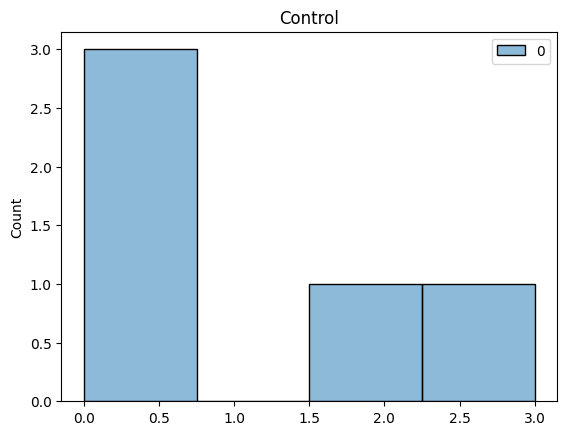

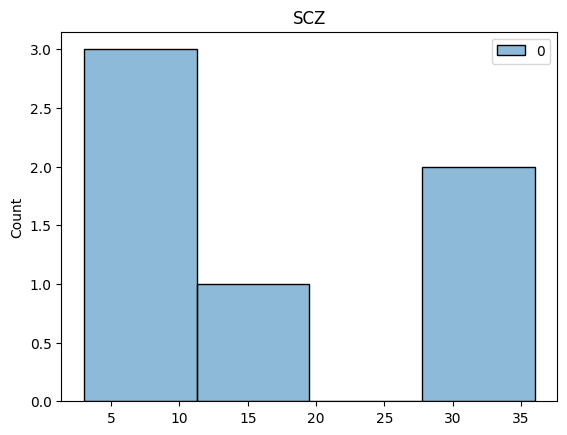

In [30]:
import anndata as ad
import matplotlib.pyplot as plt 
import seaborn as sns


df = pd.read_csv('scz_count/mRNA/All_gene_counts.list', delimiter='\t')
df.index = df.Symbol
del df['#ID']
del df['Symbol']
adata = ad.AnnData(df.T)
adata.obs['type'] = ['SCZ']*6 + ['Control']*5
mRNA_adata = adata

import scanpy as sc

sc.tl.rank_genes_groups(adata, groupby="type")
dedf = sc.get.rank_genes_groups_df(adata, group="SCZ")
print(dedf[dedf.names.isin(['PGC1A', 'PPARGC1A'])])
#sc.pl.violin(adata, ['PPARGC1A'], groupby='type')
sns.histplot(adata[adata.obs.type=='Control', 'PPARGC1A'].X)
plt.title('Control')
plt.show()
sns.histplot(adata[adata.obs.type=='SCZ', 'PPARGC1A'].X)
plt.title('SCZ')
plt.show()


In [56]:
print(adata[adata.obs.type=='Control', 'GSK3B'].X.mean())
plt.show()
print(adata[adata.obs.type=='SCZ', 'GSK3B'].X.mean())
adata

4965.6
4572.8335


AnnData object with n_obs × n_vars = 11 × 25888
    obs: 'type'
    uns: 'rank_genes_groups'

In [51]:
sc.tl.rank_genes_groups(adata, groupby="type", method='wilcoxon')
dedf = sc.get.rank_genes_groups_df(adata, group="SCZ")
print(dedf[dedf.names.isin(['GSK3B', 'GSK3B'])])


       names    scores  logfoldchanges     pvals  pvals_adj
19545  GSK3B -0.365148             NaN  0.715001        1.0


/Users/chenlingxi/miniconda3/envs/stime/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/chenlingxi/miniconda3/envs/stime/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/Users/chenlingxi/miniconda3/envs/stime/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/chenlingxi/miniconda3/envs/stime/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/chenlingxi/miniconda3/envs/stime/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchan

       names    scores  logfoldchanges     pvals  pvals_adj
21585  GSK3B -0.853437             NaN  0.427696   0.872619


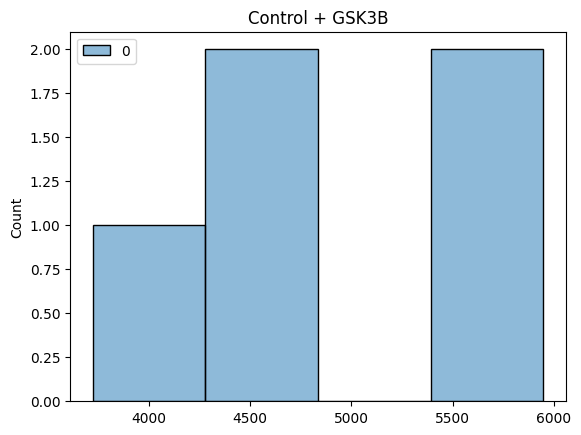

Text(0.5, 1.0, 'SCZ + GSK3B')

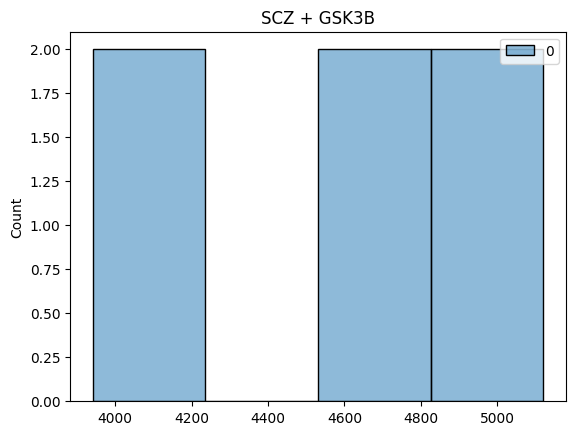

In [31]:
print(dedf[dedf.names.isin(['GSK3B', 'GSK3B'])])
#sc.pl.violin(adata, ['PPARGC1A'], groupby='type')
sns.histplot(adata[adata.obs.type=='Control', 'GSK3B'].X)
plt.title('Control + GSK3B')
plt.show()
sns.histplot(adata[adata.obs.type=='SCZ', 'GSK3B'].X)
plt.title('SCZ + GSK3B')

Index(['Case-A52', 'Case-A53', 'Case-A54', 'Case-A55', 'Case-A56', 'Case-A58',
       'Con-B02', 'Con-B04', 'Con-B08', 'Con-B21', 'Con-B22'],
      dtype='object')
               names    scores  logfoldchanges     pvals  pvals_adj
3454  hsa-miR-485-5p -2.868416      -11.329876  0.038423   0.707772


/var/folders/0x/6vsm66sd6g3_gc636v4617km0000gn/T/ipykernel_93340/729740927.py:11: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(df.T)
/Users/chenlingxi/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/chenlingxi/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/Users/chenlingxi/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/chenlingxi/miniconda3/lib/python3.9/site-packag

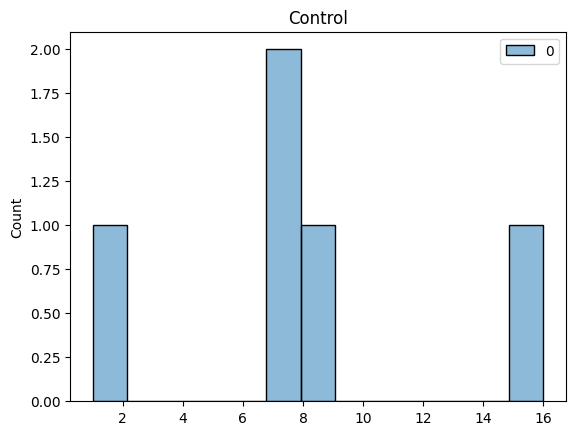

Text(0.5, 1.0, 'SCZ')

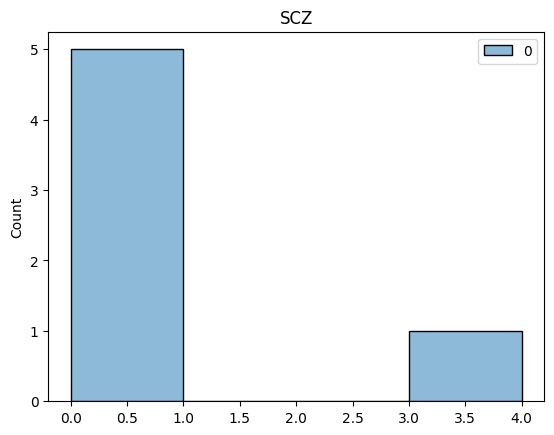

In [144]:
norm = 'count' 
#norm = 'fpkm'
df = pd.read_csv('scz_count/miRNA/All_miRNA.{}.list'.format(norm), delimiter='\t')
if norm == 'count':
    df.index = df['#miRNA']
    del df['#miRNA']
    del df['geneLength']
else:
    df.index = df['#ID']
    del df['#ID']
adata = ad.AnnData(df.T)
print(adata.obs_names)
adata.obs['type'] = ['SCZ']*6 + ['Control']*5

miRNA_adata = adata
import scanpy as sc

sc.tl.rank_genes_groups(adata, groupby="type")
dedf = sc.get.rank_genes_groups_df(adata, group="SCZ")
print(dedf[dedf.names.isin(['PGC1A', 'hsa-miR-485-5p'])])
#sc.pl.violin(adata, ['PPARGC1A'], groupby='type')
sns.histplot(adata[adata.obs.type=='Control', 'hsa-miR-485-5p'].X)
plt.title('Control')
plt.show()
sns.histplot(adata[adata.obs.type=='SCZ', 'hsa-miR-485-5p'].X)
plt.title('SCZ')

                names    scores  logfoldchanges     pvals  pvals_adj
6243  ENST00000522525  1.226559      185.948868  0.274593     0.7215


/var/folders/0x/6vsm66sd6g3_gc636v4617km0000gn/T/ipykernel_93340/741708793.py:4: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(df.T)
/Users/chenlingxi/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/chenlingxi/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/Users/chenlingxi/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/chenlingxi/miniconda3/lib/python3.9/site-package

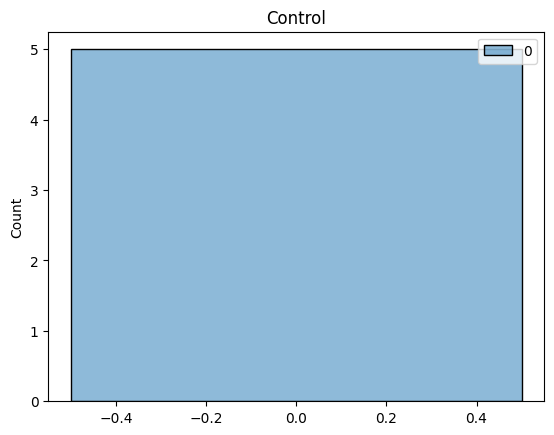

Text(0.5, 1.0, 'SCZ')

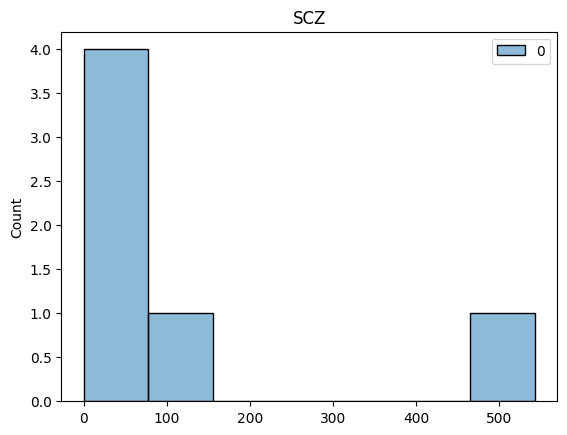

In [145]:

df = pd.read_csv('scz_count/lncRNA/LncRNA_counts.list', delimiter='\t')
df.index = df['#ID']
del df['#ID']
adata = ad.AnnData(df.T)
adata.obs['type'] = ['SCZ']*6 + ['Control']*5

lncRNA_adata = adata

import scanpy as sc

sc.tl.rank_genes_groups(adata, groupby="type")
dedf = sc.get.rank_genes_groups_df(adata, group="SCZ")
print(dedf[dedf.names.isin(['ENST00000522525', 'ENST00000522525'])])
#sc.pl.violin(adata, ['PPARGC1A'], groupby='type')
sns.histplot(adata[adata.obs.type=='Control', 'ENST00000522525'].X)
plt.title('Control')
plt.show()
sns.histplot(adata[adata.obs.type=='SCZ', 'ENST00000522525'].X)
plt.title('SCZ')



In [146]:
genes = list(set(axis_df.miRNA.tolist() + axis_df.ceRNA.tolist()))
#genes = ['PPARGC1A', 'hsa-miR-485-5p', 'MIR29B2CHG', 'THUMPD3-AS1']
genes = ['PPARGC1A', 'hsa-miR-485-5p', 'ENSG00000203709', 'ENST00000522525']
genes = ['PPARGC1A', 'hsa-miR-485-5p', 'ENST00000522525']

print(mRNA_adata.X.shape)
print(miRNA_adata.X.shape)
print(lncRNA_adata.X.shape)
adata = ad.concat([mRNA_adata.T, miRNA_adata.T, lncRNA_adata.T], merge="same").T
print(adata.X.shape)
SCZ_adata = adata[adata.obs.type == 'SCZ', adata.var_names.isin(genes)]
print(SCZ_adata.X)
Control_adata = adata[adata.obs.type == 'Control', adata.var_names.isin(genes)]
print(Control_adata.X)

(11, 25888)
(11, 3494)
(11, 51191)
(11, 80573)
[[  8.   0.   0.]
 [ 30.   4.   0.]
 [  4.   0. 543.]
 [  3.   0.  14.]
 [ 36.   0.   0.]
 [ 15.   0.  92.]]
[[ 3.  8.  0.]
 [ 0.  7.  0.]
 [ 2.  7.  0.]
 [ 0. 16.  0.]
 [ 0.  1.  0.]]


/Users/chenlingxi/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/chenlingxi/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/chenlingxi/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [149]:
from scipy import stats

data = []
for gene1, gene2 in [('PPARGC1A', 'hsa-miR-485-5p'), ('PPARGC1A', 'ENST00000522525'), ('hsa-miR-485-5p', 'ENST00000522525')]:
        
    res = stats.pearsonr(adata[:, gene1].X.T[0], adata[:, gene2].X.T[0])
    data.append(['All', gene1, gene2, 'Pearson Correlation', res.statistic, res.pvalue])
    
    #res = stats.pearsonr(SCZ_adata[:, gene1].X.T[0], SCZ_adata[:, gene2].X.T[0])
    #print('SCZ', gene1, gene2, 'pearsonr', res.statistic, res.pvalue)
    
    
    #res = stats.pearsonr(Control_adata[:, gene1].X.T[0], Control_adata[:, gene2].X.T[0])
    #print('Control', gene1, gene2, 'pearsonr', res.statistic, res.pvalue)
    
    
    res = stats.spearmanr(adata[:, gene1].X.T[0], adata[:, gene2].X.T[0])
    data.append(['All', gene1, gene2, 'Spearman Correlation', res.correlation, res.pvalue])
    
    #res = stats.spearmanr(SCZ_adata[:, gene1].X.T[0], SCZ_adata[:, gene2].X.T[0])
    #print('SCZ', gene1, gene2, 'spearmanr', res.correlation, res.pvalue)
    
    
    #res = stats.spearmanr(Control_adata[:, gene1].X.T[0], Control_adata[:, gene2].X.T[0])
    #print('Control', gene1, gene2, 'spearmanr', res.correlation, res.pvalue)
    
    res = stats.kendalltau(adata[:, gene1].X.T[0], adata[:, gene2].X.T[0])
    data.append(['All', gene1, gene2, "Kendall's tau", res.correlation, res.pvalue])
    

corr_df = pd.DataFrame(data)

corr_df.columns = ['patient', 'gene1', 'gene2', 'correlation type', 'correlation', 'p value']
corr_df.to_csv('axis_correlation.csv')
corr_df

,patient,gene1,gene2,correlation type,correlation,p value
0,All,PPARGC1A,hsa-miR-485-5p,Pearson Correlation,-0.362883,0.272707
1,All,PPARGC1A,hsa-miR-485-5p,Spearman Correlation,-0.623654,0.040328
2,All,PPARGC1A,hsa-miR-485-5p,Kendall's tau,-0.464420,0.066287
3,All,PPARGC1A,ENST00000522525,Pearson Correlation,-0.114964,0.736426
4,All,PPARGC1A,ENST00000522525,Spearman Correlation,0.242694,0.472106
5,All,PPARGC1A,ENST00000522525,Kendall's tau,0.215587,0.417263
6,All,hsa-miR-485-5p,ENST00000522525,Pearson Correlation,-0.301535,0.367519
7,All,hsa-miR-485-5p,ENST00000522525,Spearman Correlation,-0.601782,0.050138
8,All,hsa-miR-485-5p,ENST00000522525,Kendall's tau,-0.522233,0.057589
